# An example of using BluePyOpt/NeuronUnit Optimization
Using:
* Allen Brain Experimental data (`specimen_id=325479788`, sweep number `64`) to derive features from.
* EFEL feature extraction
* BluePyOpt Optimization.
* Numba JIT simple cell models (Izhikevich, Adaptive Exponential).
* Neuronunit model scoring

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="paper", font="monospace")
%matplotlib inline
SILENT = True
import warnings
if SILENT:
    warnings.filterwarnings("ignore")

from neuronunit.plotting.plot_utils import check_bin_vm_soma
from neuronunit.allenapi.allen_data_driven import opt_setup
from nb_utils import optimize_job
from sciunit.scores import RelativeDifferenceScore
import pandas as pd
import pickle
import quantities as pq
specimen_id = 325479788


In [2]:
def test_opt_relative_diff(specimen_id,model_type = "ADEXP",efel_filter_iterable=None):    
    _,scores,obs_preds,opt,target = optimize_job(specimen_id,
                                                 model_type,
                                                 score_type=RelativeDifferenceScore,
                                                 efel_filter_iterable=efel_filter_iterable)
    return obs_preds,opt,target


# Below is a plot of vm trace for fitting the simple model to with neuron unit.
* It is from Allen Specimen id `325479788`, sweep number `64`.
* sweep number 


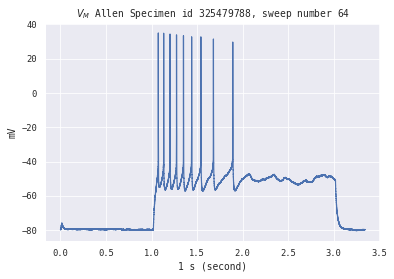

In [3]:
with open('325479788later_allen_NU_tests.p', "rb") as f:
    suite = pickle.load(f)
    
plt.plot(suite.traces["vm_soma"].times,suite.traces["vm_soma"])
plt.xlabel(pq.s)
plt.ylabel(suite.traces["vm_soma"].dimensionality)
plt.title("$V_{M}$ Allen Specimen id 325479788, sweep number 64")
plt.show()


# Example 1
* Izhikevich model 
* Allen specimen `325479788`

In [4]:
efel_filter_iterable = [
    "ISI_log_slope",
    "mean_frequency",
    "adaptation_index2",
    "first_isi",
    "ISI_CV",
    "median_isi",
    "Spikecount",
    "all_ISI_values",
    "ISI_values",
    "time_to_first_spike",
    "time_to_last_spike",
    "time_to_second_spike",
    ]
obs_preds,opt,target = test_opt_relative_diff(specimen_id = 325479788,model_type="IZHI",efel_filter_iterable=efel_filter_iterable)


64 sweep number
3.34285 s len recording


INFO:__main__:gen	nevals	avg    	std    	min    	max  
1  	200   	4920.71	8146.33	19.3253	19000
gen	nevals	avg    	std    	min    	max  
1  	200   	4920.71	8146.33	19.3253	19000


INFO:__main__:2  	129   	4639.79	7971.55	19.3253	19000
2  	129   	4639.79	7971.55	19.3253	19000
INFO:__main__:3  	20    	959.145	3926.21	19.3253	19000
3  	20    	959.145	3926.21	19.3253	19000
INFO:__main__:4  	24    	913.907	3919.49	19.3253	19000
4  	24    	913.907	3919.49	19.3253	19000
INFO:__main__:5  	16    	1387.64	4751.66	19.3253	19000
5  	16    	1387.64	4751.66	19.3253	19000
INFO:__main__:6  	21    	1177.61	4492.47	19.3253	19000
6  	21    	1177.61	4492.47	19.3253	19000
INFO:__main__:7  	20    	1449   	4984.43	19.3253	19000
7  	20    	1449   	4984.43	19.3253	19000
INFO:__main__:8  	18    	590.675	3229.21	19.2592	19000
8  	18    	590.675	3229.21	19.2592	19000
INFO:__main__:9  	16    	1174.07	4493.37	19.2592	19000
9  	16    	1174.07	4493.37	19.2592	19000
INFO:__main__:10 	18    	872.782	3924.66	16.4508	19000
10 	18    	872.782	3924.66	16.4508	19000
INFO:__main__:11 	22    	869.926	3925.28	16.4508	19000
11 	22    	869.926	3925.28	16.4508	19000
INFO:__main__:12 	24    	870.06 	3925.25

84 	26    	9.59575	5.37428	2.42171	27.1985
INFO:__main__:85 	20    	10.3033	4.75709	2.42171	27.8344
85 	20    	10.3033	4.75709	2.42171	27.8344
INFO:__main__:86 	24    	10.4834	4.28369	2.42171	19.9219
86 	24    	10.4834	4.28369	2.42171	19.9219
INFO:__main__:87 	20    	8.77436	4.33883	2.42171	19.9219
87 	20    	8.77436	4.33883	2.42171	19.9219
INFO:__main__:88 	24    	10.5327	5.86565	2.42171	41.6493
88 	24    	10.5327	5.86565	2.42171	41.6493
INFO:__main__:89 	14    	7.17363	3.41271	2.42171	14.7613
89 	14    	7.17363	3.41271	2.42171	14.7613
INFO:__main__:90 	21    	10.5074	3.66162	2.42171	24.3503
90 	21    	10.5074	3.66162	2.42171	24.3503
INFO:__main__:91 	18    	9.10802	3.28561	2.42171	19.0022
91 	18    	9.10802	3.28561	2.42171	19.0022
INFO:__main__:92 	22    	10.2904	4.06432	2.42171	29.369 
92 	22    	10.2904	4.06432	2.42171	29.369 
INFO:__main__:93 	20    	9.37956	5.85391	2.42171	40.4534
93 	20    	9.37956	5.85391	2.42171	40.4534
INFO:__main__:94 	16    	10.2619	6.21892	2.42171	41.9324


166	12    	7.6135 	5.20396	1.72354	41.8203
INFO:__main__:167	18    	6.29592	3.95777	1.72354	18.2616
167	18    	6.29592	3.95777	1.72354	18.2616
INFO:__main__:168	15    	9.28168	3.32118	1.72354	16.0806
168	15    	9.28168	3.32118	1.72354	16.0806
INFO:__main__:169	22    	292.335	2302.76	1.72354	19000  
169	22    	292.335	2302.76	1.72354	19000  
INFO:__main__:170	21    	7.08103	3.98144	1.72354	26.0166
170	21    	7.08103	3.98144	1.72354	26.0166
INFO:__main__:171	17    	7.10618	3.21537	1.72354	14.1396
171	17    	7.10618	3.21537	1.72354	14.1396
INFO:__main__:172	19    	8.61416	3.74815	1.72354	24.8303
172	19    	8.61416	3.74815	1.72354	24.8303
INFO:__main__:173	12    	7.81316	2.99352	1.72354	15.7863
173	12    	7.81316	2.99352	1.72354	15.7863
INFO:__main__:174	18    	8.81789	2.93566	1.72354	15.7863
174	18    	8.81789	2.93566	1.72354	15.7863
INFO:__main__:175	22    	8.46115	3.80415	1.72354	28.6965
175	22    	8.46115	3.80415	1.72354	28.6965
INFO:__main__:176	20    	7.30962	3.67186	1.72354	24.1177


248	24    	293.026	2302.67	1.49456	19000  
INFO:__main__:249	18    	6.32284	4.39237	1.49456	19.0275
249	18    	6.32284	4.39237	1.49456	19.0275
INFO:__main__:250	22    	7.72364	3.42247	1.49456	16.2955
250	22    	7.72364	3.42247	1.49456	16.2955
INFO:__main__:251	20    	7.95551	3.49851	1.49456	17.5702
251	20    	7.95551	3.49851	1.49456	17.5702
INFO:__main__:252	17    	6.99772	3.33792	1.49456	12.4914
252	17    	6.99772	3.33792	1.49456	12.4914
INFO:__main__:253	24    	9.18681	2.78861	1.49456	15.2734
253	24    	9.18681	2.78861	1.49456	15.2734
INFO:__main__:254	17    	8.73733	3.32773	1.49456	14.917 
254	17    	8.73733	3.32773	1.49456	14.917 
INFO:__main__:255	21    	10.101 	4.04885	1.49456	24.1794
255	21    	10.101 	4.04885	1.49456	24.1794
INFO:__main__:256	25    	8.60888	3.98241	1.49456	25.3176
256	25    	8.60888	3.98241	1.49456	25.3176
INFO:__main__:257	21    	291.869	2302.81	1.49456	19000  
257	21    	291.869	2302.81	1.49456	19000  
INFO:__main__:258	24    	6.23318	3.25858	1.49456	16.3097


330	21    	293.477	2302.62	0.924865	19000  
INFO:__main__:331	18    	7.86546	4.32666	0.924865	27.1302
331	18    	7.86546	4.32666	0.924865	27.1302
INFO:__main__:332	22    	9.85836	3.14252	0.924865	16.3207
332	22    	9.85836	3.14252	0.924865	16.3207
INFO:__main__:333	26    	11.2923	5.31172	0.924865	42.1094
333	26    	11.2923	5.31172	0.924865	42.1094
INFO:__main__:334	21    	575.45 	3231.88	0.924865	19000  
334	21    	575.45 	3231.88	0.924865	19000  
INFO:__main__:335	17    	6.66003	6.75679	0.924865	41.1071
335	17    	6.66003	6.75679	0.924865	41.1071
INFO:__main__:336	25    	10.0135	3.48532	0.924865	26.9479
336	25    	10.0135	3.48532	0.924865	26.9479
INFO:__main__:337	19    	8.47294	3.8972 	0.924865	16.2911
337	19    	8.47294	3.8972 	0.924865	16.2911
INFO:__main__:338	22    	8.53845	3.58981	0.924865	15.9973
338	22    	8.53845	3.58981	0.924865	15.9973
INFO:__main__:339	22    	7.48583	4.43653	0.924865	16.3627
339	22    	7.48583	4.43653	0.924865	16.3627
INFO:__main__:340	18    	10.1809	3.377

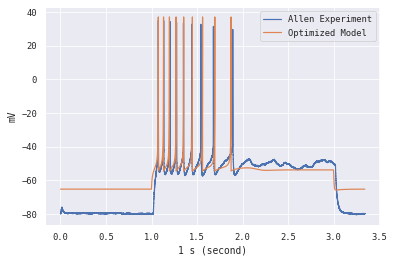

In [5]:

check_bin_vm_soma(target,opt)

In [6]:
opt.attrs_to_params()
params = pd.DataFrame([opt.params])
params

,C,k,vr,vt,vPeak,a,b,c,d,celltype
0,131.88,1.4,-65.17,-41.62,37.13,0.01,1.33,-54.4,-11.14,7


In [7]:
df = pd.DataFrame(obs_preds)
df.rename(columns={0:'EFEL_feature_NU_test_Name',1:'prediction',2:'observation',3:'neuronunit_score'},inplace=True)
df

,EFEL_feature_NU_test_Name,prediction,observation,neuronunit_score
0,ISI_log_slope,0.485704,0.561301,Relative Difference = 0.08
1,mean_frequency,10.086294,9.466709,Relative Difference = 0.62
2,adaptation_index2,0.091943,0.103378,Relative Difference = 0.01
3,ISI_CV,0.476055,0.482996,Relative Difference = 0.01
4,Spikecount,9.000000,9.000000,Relative Difference = 0.00
5,all_ISI_values,102.212500,109.437500,Relative Difference = 7.22
6,ISI_values,108.400000,116.785714,Relative Difference = 8.39
7,time_to_first_spike,74.600000,75.200000,Relative Difference = 0.60
8,time_to_last_spike,892.300000,950.700000,Relative Difference = 58.40
9,time_to_second_spike,133.500000,133.200000,Relative Difference = 0.30


# Example 2
* Now fit Adaptive Exponential model to a single sweep from Allen specimen 325479788 sweep number 64

In [8]:
efel_filter_iterable = [
    "ISI_log_slope",
    "mean_frequency",
    "adaptation_index2",
    "first_isi",
    "ISI_CV",
    "median_isi",
    "Spikecount",
    "all_ISI_values",
    "ISI_values",
    "time_to_first_spike",
    "time_to_last_spike",
    "time_to_second_spike",
    "peak_voltage",
    "AHP_depth",
    "AHP_depth_abs",
    "base_base"
    ]
obs_preds,opt,target = test_opt_relative_diff(specimen_id = 325479788,efel_filter_iterable=efel_filter_iterable)


64 sweep number
3.34285 s len recording


INFO:__main__:gen	nevals	avg    	std    	min    	max  
1  	100   	4993.29	7864.78	22.1244	22000
gen	nevals	avg    	std    	min    	max  
1  	100   	4993.29	7864.78	22.1244	22000


INFO:__main__:2  	65    	5167.87	7827.38	17.084 	22000
2  	65    	5167.87	7827.38	17.084 	22000
INFO:__main__:3  	8     	40.9968	35.8498	17.084 	180.907
3  	8     	40.9968	35.8498	17.084 	180.907
INFO:__main__:4  	10    	29.714 	5.52937	17.084 	40.9324
4  	10    	29.714 	5.52937	17.084 	40.9324
INFO:__main__:5  	8     	455.327	2401.05	17.084 	14037.7
5  	8     	455.327	2401.05	17.084 	14037.7
INFO:__main__:6  	10    	27.5597	7.11388	17.084 	38.1487
6  	10    	27.5597	7.11388	17.084 	38.1487
INFO:__main__:7  	8     	122.37 	515.174	17.084 	3036.55
7  	8     	122.37 	515.174	17.084 	3036.55
INFO:__main__:8  	8     	394.257	981.345	17.084 	3036.55
8  	8     	394.257	981.345	17.084 	3036.55
INFO:__main__:9  	7     	213.907	716.976	17.084 	3036.55
9  	7     	213.907	716.976	17.084 	3036.55
INFO:__main__:10 	8     	31.4451	6.21532	17.084 	38.5453
10 	8     	31.4451	6.21532	17.084 	38.5453
INFO:__main__:11 	14    	636.109	2403.56	17.084 	11046.9
11 	14    	636.109	2403.56	17.084 	11046.9
INFO

INFO:__main__:84 	14    	19.525 	3.67284	10.2178	23.7647
84 	14    	19.525 	3.67284	10.2178	23.7647
INFO:__main__:85 	11    	18.2222	3.89813	10.2178	24.4346
85 	11    	18.2222	3.89813	10.2178	24.4346
INFO:__main__:86 	11    	18.3979	3.38147	10.2178	22.7206
86 	11    	18.3979	3.38147	10.2178	22.7206
INFO:__main__:87 	13    	17.6651	3.52003	10.2178	23.0426
87 	13    	17.6651	3.52003	10.2178	23.0426
INFO:__main__:88 	14    	16.9674	4.29126	10.2178	23.0426
88 	14    	16.9674	4.29126	10.2178	23.0426
INFO:__main__:89 	10    	18.4906	4.52207	10.2178	23.5463
89 	10    	18.4906	4.52207	10.2178	23.5463
INFO:__main__:90 	8     	16.5979	4.52499	10.2178	22.6271
90 	8     	16.5979	4.52499	10.2178	22.6271
INFO:__main__:91 	8     	16.1444	3.80284	10.2178	22.5124
91 	8     	16.1444	3.80284	10.2178	22.5124
INFO:__main__:92 	14    	17.983 	3.67229	10.2178	22.9927
92 	14    	17.983 	3.67229	10.2178	22.9927
INFO:__main__:93 	9     	17.7073	4.04535	10.2178	22.9927
93 	9     	17.7073	4.04535	10.2178	22.9927


INFO:__main__:166	9     	14.6325	2.56561	5.98383	17.8618
166	9     	14.6325	2.56561	5.98383	17.8618
INFO:__main__:167	9     	14.4976	2.84435	5.98383	17.8618
167	9     	14.4976	2.84435	5.98383	17.8618
INFO:__main__:168	8     	13.6511	3.76975	5.98383	19.6644
168	8     	13.6511	3.76975	5.98383	19.6644
INFO:__main__:169	8     	15.7582	3.09874	5.98383	22.448 
169	8     	15.7582	3.09874	5.98383	22.448 
INFO:__main__:170	9     	16.3343	2.33659	5.98383	20.4176
170	9     	16.3343	2.33659	5.98383	20.4176
INFO:__main__:171	8     	14.0053	4.05995	5.98383	20.4176
171	8     	14.0053	4.05995	5.98383	20.4176
INFO:__main__:172	9     	15.1723	3.08952	5.98383	20.4176
172	9     	15.1723	3.08952	5.98383	20.4176
INFO:__main__:173	8     	14.5929	3.59445	5.98383	20.6714
173	8     	14.5929	3.59445	5.98383	20.6714
INFO:__main__:174	6     	15.1522	4.83131	5.98383	21.4816
174	6     	15.1522	4.83131	5.98383	21.4816
INFO:__main__:175	6     	15.5472	4.35459	5.98383	21.4816
175	6     	15.5472	4.35459	5.98383	21.4816


INFO:__main__:248	10    	14.4432	3.93011	5.98383	21.5104
248	10    	14.4432	3.93011	5.98383	21.5104
INFO:__main__:249	8     	16.1916	3.25956	5.98383	19.7477
249	8     	16.1916	3.25956	5.98383	19.7477
INFO:__main__:250	14    	14.0699	4.41557	5.98383	22.4283
250	14    	14.0699	4.41557	5.98383	22.4283
INFO:__main__:251	8     	16.6873	3.13678	5.98383	20.753 
251	8     	16.6873	3.13678	5.98383	20.753 
INFO:__main__:252	9     	15.527 	4.34921	5.98383	20.753 
252	9     	15.527 	4.34921	5.98383	20.753 
INFO:__main__:253	10    	15.1539	3.32951	5.98383	22.2908
253	10    	15.1539	3.32951	5.98383	22.2908
INFO:__main__:254	12    	16.1877	2.89569	5.98383	20.753 
254	12    	16.1877	2.89569	5.98383	20.753 
INFO:__main__:255	10    	16.4705	3.7419 	5.98383	20.753 
255	10    	16.4705	3.7419 	5.98383	20.753 
INFO:__main__:256	10    	14.8975	5.02211	5.98383	21.4385
256	10    	14.8975	5.02211	5.98383	21.4385
INFO:__main__:257	8     	14.8725	3.33137	5.98383	21.4504
257	8     	14.8725	3.33137	5.98383	21.4504


INFO:__main__:330	8     	13.4803	3.26799	5.98383	20.2681
330	8     	13.4803	3.26799	5.98383	20.2681
INFO:__main__:331	6     	11.6131	3.88566	5.98383	19.1549
331	6     	11.6131	3.88566	5.98383	19.1549
INFO:__main__:332	8     	13.6085	2.98637	5.98383	19.1549
332	8     	13.6085	2.98637	5.98383	19.1549
INFO:__main__:333	12    	13.8679	2.61877	5.98383	19.869 
333	12    	13.8679	2.61877	5.98383	19.869 
INFO:__main__:334	12    	13.5008	4.3737 	5.98383	21.465 
334	12    	13.5008	4.3737 	5.98383	21.465 
INFO:__main__:335	8     	15.0741	4.33968	5.98383	20.5712
335	8     	15.0741	4.33968	5.98383	20.5712
INFO:__main__:336	10    	14.5035	3.92174	5.98383	20.5712
336	10    	14.5035	3.92174	5.98383	20.5712
INFO:__main__:337	4     	12.4676	4.5199 	5.98383	18.7134
337	4     	12.4676	4.5199 	5.98383	18.7134
INFO:__main__:338	8     	14.0431	3.8735 	5.98383	18.7134
338	8     	14.0431	3.8735 	5.98383	18.7134
INFO:__main__:339	10    	12.6017	4.2123 	5.98383	19.7591
339	10    	12.6017	4.2123 	5.98383	19.7591


In [9]:
df = pd.DataFrame(obs_preds)
df.rename(columns={0:'EFEL_feature_NU_test_Name',1:'prediction',2:'observation',3:'neuronunit_score'},inplace=True)
df

,EFEL_feature_NU_test_Name,prediction,observation,neuronunit_score
0,ISI_log_slope,0.485704,0.370832,Relative Difference = 0.11
1,mean_frequency,10.086294,10.348396,Relative Difference = 0.26
2,adaptation_index2,0.091943,0.065572,Relative Difference = 0.03
3,ISI_CV,0.476055,0.293762,Relative Difference = 0.18
4,Spikecount,9.000000,9.000000,Relative Difference = 0.00
5,all_ISI_values,102.212500,99.837500,Relative Difference = 2.37
6,ISI_values,108.400000,104.528571,Relative Difference = 3.87
7,time_to_first_spike,74.600000,71.000000,Relative Difference = 3.60
8,time_to_last_spike,892.300000,869.700000,Relative Difference = 22.60
9,time_to_second_spike,133.500000,138.000000,Relative Difference = 4.50


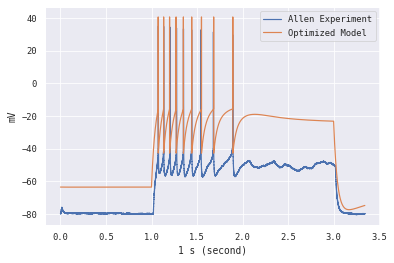

In [11]:
check_bin_vm_soma(target,opt)

In [12]:
opt.attrs_to_params()
params = pd.DataFrame([opt.params])
params


,cm,v_spike,v_reset,v_rest,tau_m,a,b,delta_T,tau_w,v_thresh,spike_delta
0,800.84,-40.67,-42.87,-63.45,40.44,8.85,8.77,5.83,232.89,-15.61,40.68
